# Midterm Take Home Component

`mdt.jpg` has been corrupted with Gaussian noise.  In other words, a normally distributed random value has been added to each pixel of the image.  It is known that the original image contained only the values 0 and 255 (black and white).  It can also be assumed that the original image was fairly simple, so that the probability of neighboring pixels being the same color is quite high.  Under these conditions, neighboring pixels can be seen as multiple observations of the same signal.  Taking the average of multiple realizations will boost the SNR in proportion to the number of pixels averaged.  There is a trade off however: treating neighboring pixels as being identical is merely an approximation. As we average across more and more pixels, the amount of detail possible in the recovered image will decrease.

Let's assume for a second that we are taking the average of a pixels value and its 8 direct neighbors (the square around it) in order to calculate it's value.  This operation is equivalent to multiplying the 3x3 image sample by a 3x3 matrix of the value 1/9 (called a kernel) and taking the sum of the result. This set of operations done across all pixels is referred to as a 2D convolution, and is heavily used in image processing. The beauty of a kernel operation is that the values stored in the kernel matrix do not have to be uniform.  Assume, say, that we know that the value of a pixel relies more on its vertical than horizontal neighbors.  Applying heavier weights to the top and bottom rows of the kernel can help us exploit this. After denoising the image using the 2 dimensional convolution, all that is left to do is to decide whether each pixel was originally white or black.  If the sum of the values in the kernel matrix is 1, then a maximum likelihood detector with threshold $\gamma = 128$ is optimal.
In the code below, I apply an equally weighted kernel of size 30 to `mdt.jpg` to uncover the uncorrupted image, which says "LIFE IS GOOD"

In [1]:
img = imread("mdt.jpg");

nsamples =  30


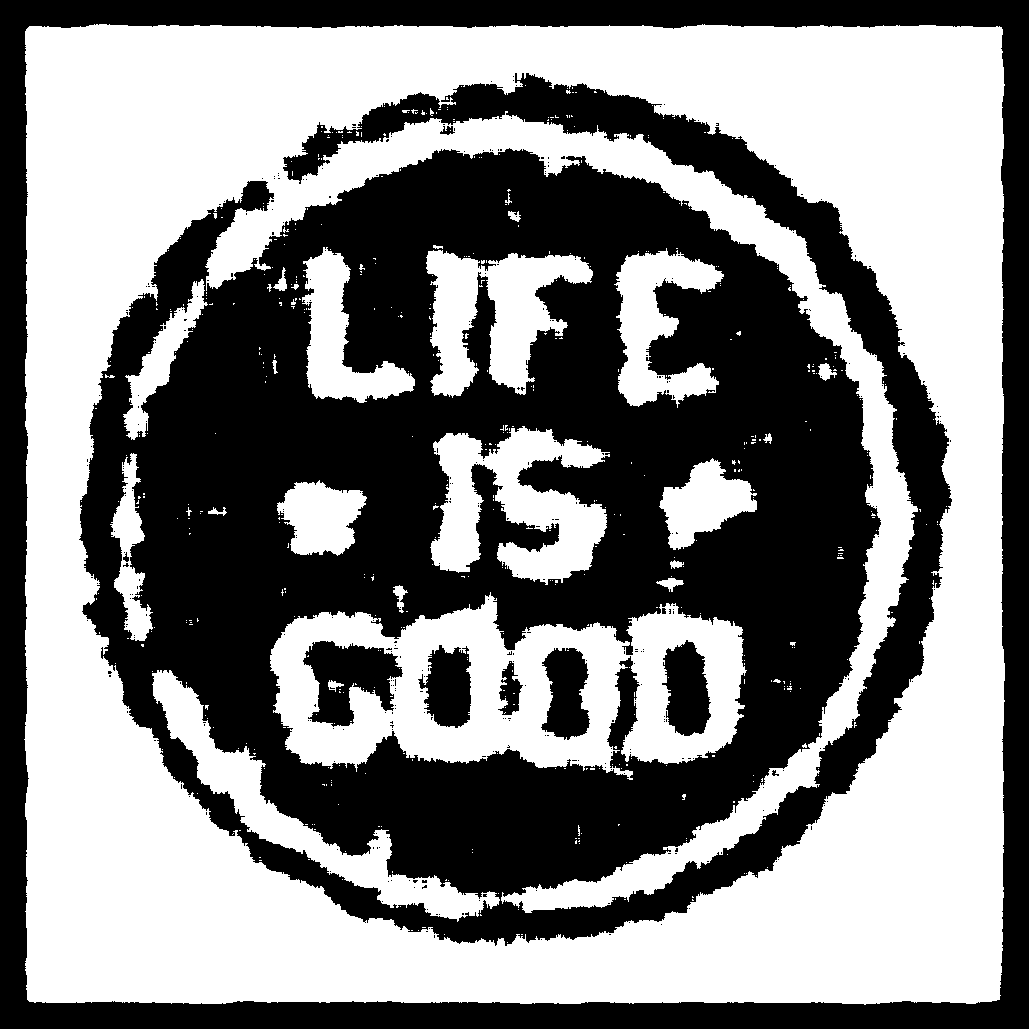

In [47]:
nsamples = 30
kernel = ones(nsamples, nsamples) / nsamples^2;
smoothed = conv2(img, kernel);
smoothed = round(smoothed/256) * 256;
imshow(smoothed)
drawnow;